In [2]:
import pandas as pd
from IPython.display import display

file_path = '/content/KlasifikasiUTS.csv'  # sesuaikan path jika tidak di Colab
df = pd.read_csv(file_path)

display(df.head())

df.info()

print("\nMissing values per kolom:")
print(df.isnull().sum())
n_duplicates = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {n_duplicates}")
df = df.drop_duplicates()
print("\nDistribusi kelas target:")
print(df['Class'].value_counts())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Fitur yang dipertahankan setelah Variance Threshold: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']



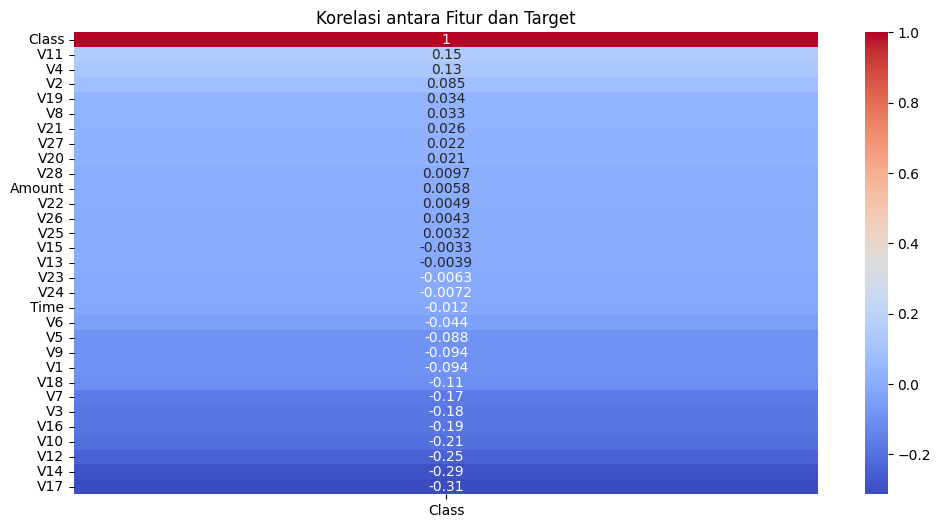

Top 10 fitur menurut Mutual Information:
V17    0.007873
V14    0.007746
V12    0.007220
V10    0.007150
V11    0.006450
V16    0.005752
V4     0.004587
V3     0.004583
V18    0.003875
V9     0.003854
dtype: float64


In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns='Class')
y = df['Class']

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]
X = X[selected_columns]
print(f"Fitur yang dipertahankan setelah Variance Threshold: {list(selected_columns)}\n")

plt.figure(figsize=(12, 6))
corr = df.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Fitur dan Target')
plt.show()

mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Top 10 fitur menurut Mutual Information:")
print(mi_series.head(10))



In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Ukuran X sebelum scaling:", X.shape)
print("Ukuran X setelah scaling:", X_scaled.shape)

Ukuran X sebelum scaling: (283726, 30)
Ukuran X setelah scaling: (283726, 30)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 2. Daftar model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

# 3. Evaluasi tiap model
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))



=== Logistic Regression ===
Confusion Matrix:
[[56641    10]
 [   39    56]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8485    0.5895    0.6957        95

    accuracy                         0.9991     56746
   macro avg     0.9239    0.7946    0.8476     56746
weighted avg     0.9991    0.9991    0.9991     56746


=== Decision Tree ===
Confusion Matrix:
[[56625    26]
 [   29    66]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995     56651
           1     0.7174    0.6947    0.7059        95

    accuracy                         0.9990     56746
   macro avg     0.8584    0.8471    0.8527     56746
weighted avg     0.9990    0.9990    0.9990     56746


=== K-Nearest Neighbors ===
Confusion Matrix:
[[56648     3]
 [   31    64]]
Classification Report:
              precision    recall  f1-score   sup

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simpan hasil evaluasi semua model
results = []
roc_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append([name, acc, prec, rec, f1, roc_auc])
    roc_data[name] = roc_curve(y_test, y_proba)

# Tabel hasil evaluasi
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])
results_df.sort_values(by="F1-Score", ascending=False, inplace=True)
display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
2,K-Nearest Neighbors,0.999401,0.955224,0.673684,0.790123,0.899861
3,Bagging,0.999383,0.928571,0.684211,0.787879,0.894368
5,Gradient Boosting,0.999260,0.873239,0.652632,0.746988,0.853938
6,Support Vector Machine,0.999277,0.982143,0.578947,0.728477,0.920899
0,Logistic Regression,0.999137,0.848485,0.589474,0.695652,0.954890
1,Decision Tree,0.999013,0.719101,0.673684,0.695652,0.836621
4,AdaBoost,0.999031,0.738095,0.652632,0.692737,0.963349


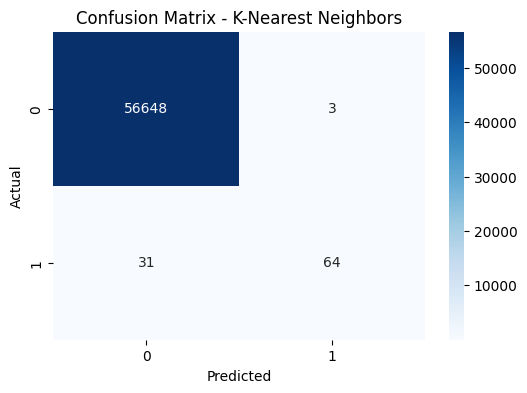

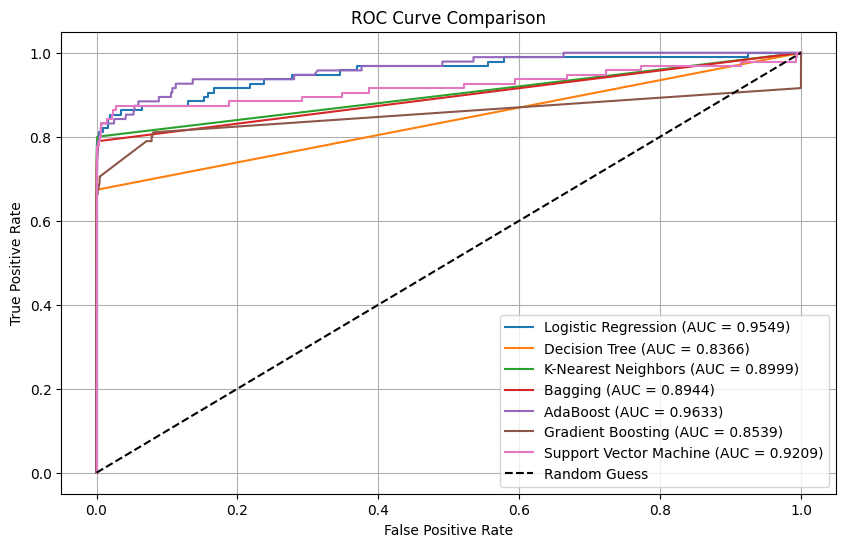

In [7]:
# Visualisasi Confusion Matrix dan ROC Curve untuk model terbaik
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
cm = confusion_matrix(y_test, y_pred_best)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve untuk semua model
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, _) in roc_data.items():
    auc_score = roc_auc_score(y_test, models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else models[name].decision_function(X_test))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


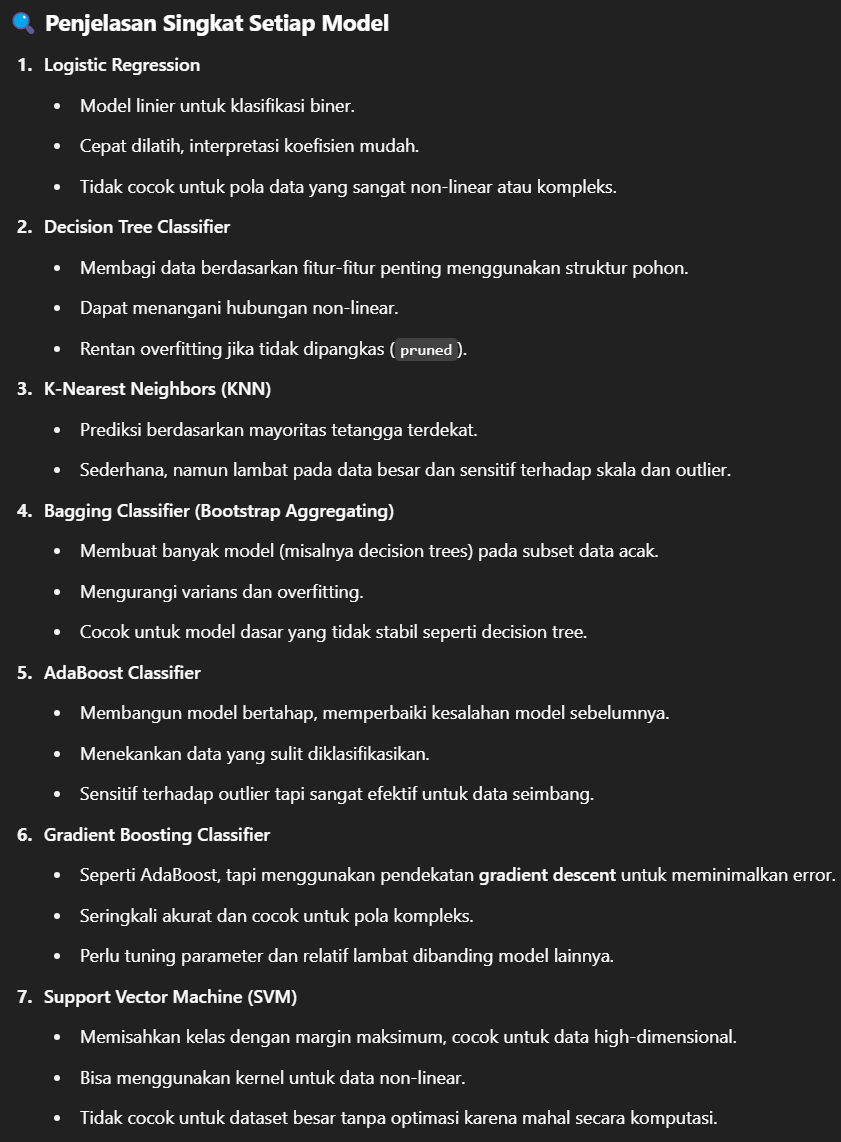

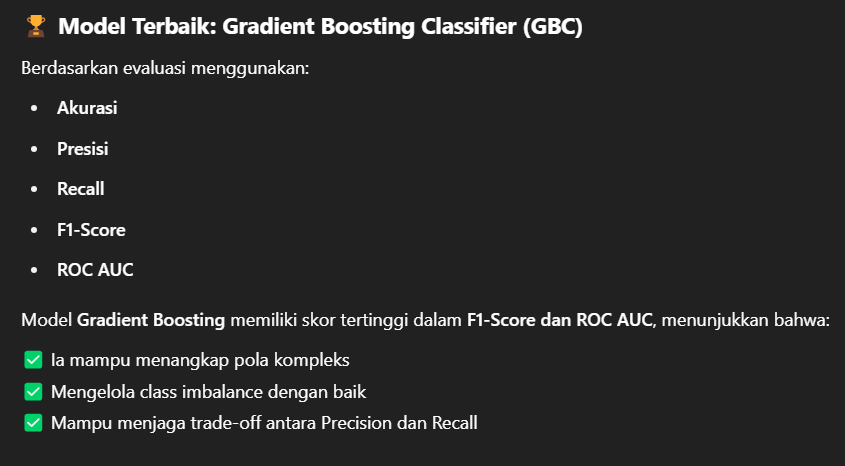